In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from pandas import Series
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data= pd.read_csv("bbc-text.csv")

In [3]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


In [5]:
data.category[data.category == 'sport'] = 1
data.category[data.category == 'business'] = 2
data.category[data.category == 'politics'] = 3
data.category[data.category == 'tech'] = 4
data.category[data.category == 'entertainment'] = 5

In [6]:
data.head()

,category,text
0,4,tv future in the hands of viewers with home th...
1,2,worldcom boss left books alone former worldc...
2,1,tigers wary of farrell gamble leicester say ...
3,1,yeading face newcastle in fa cup premiership s...
4,5,ocean s twelve raids box office ocean s twelve...


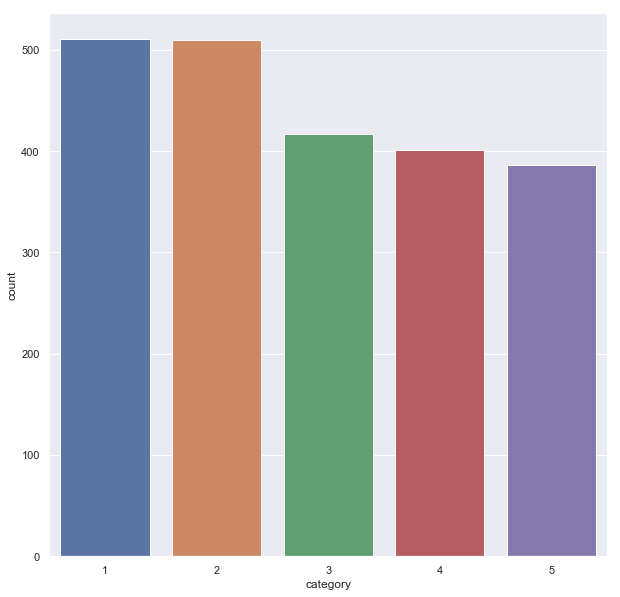

In [7]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data['category'])

In [8]:
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True,lowercase = True,strip_accents='ascii',stop_words=stopset)

In [9]:
y=data.category

In [10]:
y=y.astype('int')


In [11]:
X=vectorizer.fit_transform(data.text)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

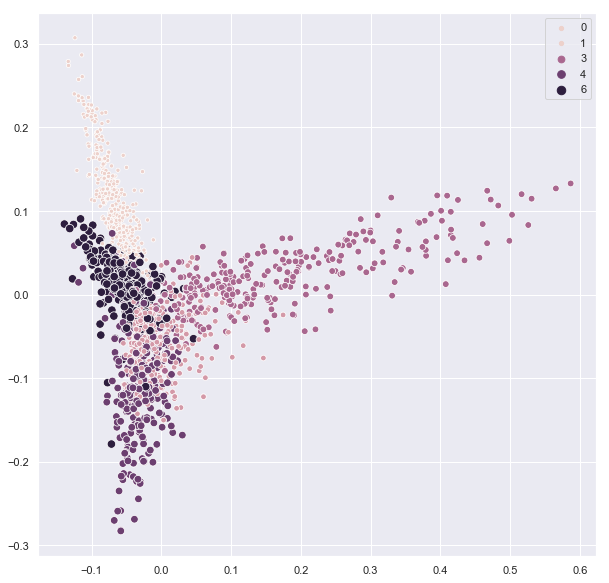

In [13]:
# plot the train features
pca = PCA(n_components=2).fit(X_train.toarray())
data2D = pca.transform(X_train.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=y_train.tolist(),size= y_train.tolist())

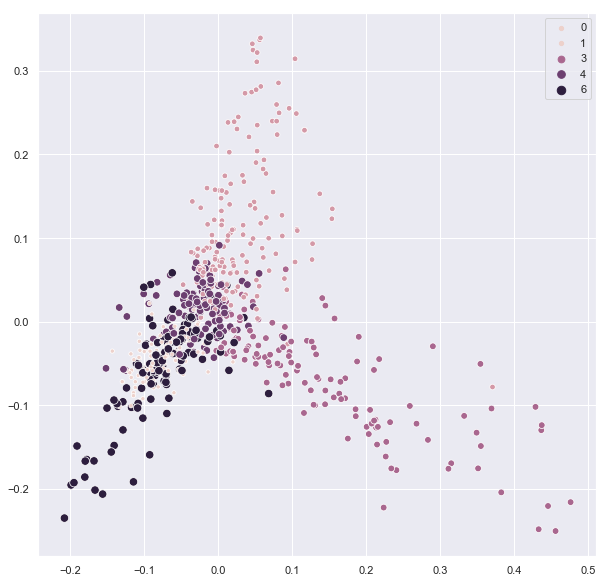

In [14]:
# plot the test features
pca = PCA(n_components=2).fit(X_test.toarray())
data2D = pca.transform(X_test.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=y_test.tolist(),size= y_test.tolist())

In [15]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
#accuracy on traning data

In [17]:
print(classification_report(y_train, clf.predict(X_train)))
print(confusion_matrix(y_train, clf.predict(X_train)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00       367
          2       0.99      0.99      0.99       336
          3       0.99      0.99      0.99       289
          4       0.98      0.99      0.99       293
          5       1.00      0.98      0.99       272

avg / total       0.99      0.99      0.99      1557

[[366   1   0   0   0]
 [  0 332   2   2   0]
 [  0   1 286   2   0]
 [  1   0   0 291   1]
 [  0   2   2   2 266]]


In [18]:
#log loss of training

In [19]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
print (results.mean())

-0.3232848994556198


In [20]:
#accuracy on test data

In [21]:
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          1       0.99      1.00      1.00       144
          2       0.98      0.95      0.97       174
          3       0.92      0.99      0.95       128
          4       0.95      0.97      0.96       108
          5       1.00      0.91      0.95       114

avg / total       0.97      0.97      0.97       668

[[144   0   0   0   0]
 [  1 166   3   4   0]
 [  0   1 127   0   0]
 [  0   0   3 105   0]
 [  0   3   5   2 104]]


In [22]:
#logloss

In [23]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(clf, X_test, y_test, cv=kfold, scoring=scoring)
print (results.mean())

-0.6472503923341029
